# Project Planning Stage (Individual)

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## 1. Data Description
### Players Dataset

- Number of observations: 196
- Number of variables: 7

| Key Variables | `name`  | `gender` | `Age` | `hashedEmail` | `played_hours` | `subscribe` | `experience` |
| :------------ | :------:| :------: | :----:| :-----------: | :-----------:  |:-----------:|:-----------: |
| Type          |   chr   |   chr    |  dbl  |      chr      |       dbl      |     lgl     |      chr     |
| Max           |      /   |    /      |  50   |     /          |      223.1     |       /      |    /          |
| Min           |     /    |   /       |   8   |      /         |        0       |      /       |     /         |
| Mean          |       /  |  /        | 20.52 |       /        |     5.8459     |     /        |      /        |

- Key Variables Meaning:
  - `name`: The name of the players.
  - `gender`: The gender of the players.
  - `Age`: The age of the players.
  - `hashedEmail`: Anonymized unique identifier for players.
  - `played_hours`: Total time players spend on playing this game.
  - `subscribe`: If the players subscribe or not (True for subscribe, False for not subscribe).
  - `experience`: Different experience of players.
- Potential Issues:
    - There are multiple entries in `hashedEmail` field, potentially due to repeated logins or incorrect data handling.
    - There are some missing value in `Age`.
### Sessions Dataset
- Number of observations: 1535
- Number of variables: 5
| Key Variables | `hashedEmail` | `start_time` | `end_time` | `original_start_time` | `original_end_time` |
| :------------ |:-----------:  | :-----------:|:----------:|:--------------------: | :-----------------: |
| Type          |      chr      |       chr    |     chr    |      dbl              |       dbl           |
| Max           |       /        |      /        |     /       |            /           |    /                 |
| Min           |        /       |       /       |      /      |         /              |     /                |
| Mean          |         /      |        /      |      /      |         /              |    /                 |
- Key Variables Meaning:
  - `hashedEmail`: Anonymized unique identifier for players.
  - `start_time`: The session start time.
  - `end_time`: The session end time.
  - `original_start_time`: The session original start time.
  - `original_end_time`: The session original end time.
- Potential Issues:
  - Mismatched Data Types for `original_start_time` and `original_end_time`.
  - There are some missing value in `original_end_time`.

## 2. Questions
### Broad quesiton: 
- What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### Specific question:
- Can `Age` and `played_hours` predict `subscribe` in `players.csv` dataset?
### How the data will help to address the question?
- There are 3 key variables from dataset `players.csv` for this analysis:
  - `Age`: The age of the players.
  - `played_hours`: Total time players spend on playing this game.
  - `subscribe`: If the players subscribe or not (True = 1, False = 2).
- By analysing the three variables we can identify the relationship in how `Age` and `played_hours` correlate with `subscribe`. We can also develop predictive models to assess how well the variables (`Age` and `played_hours`) can predict subscription (`subscribe`) likelihood.
- Wrangling data: Firstly we need to clean and prepare the dataset by following steps.
  - Check the missing values in `Age`, `played_hours` and `subscribe`. If there are missing values in `Age` or `played_hours`, replace it by the mean values or remove these rows. If `subscribe` have missing values, we remove these rows.
- Change `subscribe` to a binary categorical variable (1 for True, 2 for False).
- Visualization: Use scatter Plots to explore the possible relationships between `Age`, `played_hours`, and `subscribe`.
- Measure how strongly age and played_hours correlate with is_subscribed.

## 3. Exploratory Data Analysis and Visualization

### a. Demonstrate that the dataset can be loaded into R.

In [2]:
# Reading the data of 'Players'
Players <- read_csv("https://raw.githubusercontent.com/Vivian-Bi/ds_project_individual/refs/heads/main/players.csv")
Players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
# Reading the data of 'Sessions'
Sessions <- read_csv("https://raw.githubusercontent.com/Vivian-Bi/ds_project_individual/refs/heads/main/sessions.csv")
Sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### b. Wrangling

In [27]:
# Wrangling for Sessions
Sessions_tidy <- Sessions |>
                    filter(start_time != 'NA') |>
                    filter(end_time != 'NA') |>
                    filter(original_start_time != 'NA') |>
                    filter(original_end_time != 'NA') |>
                    filter(start_time != 'NA') |>
                    filter(end_time != 'NA') |>
                    select(-starts_with("original")) |>
                    separate(col = start_time, into = c("start_date", "start_time"), sep = "\ ") |>
                    separate(col = end_time, into = c("end_date", "end_time"), sep = "\ ") |>
                    separate(col = start_time, into = c("start_hour", "start_minute"), sep = ":") |>
                    separate(col = end_time, into = c("end_hour", "end_minute"), sep = ":")
Sessions_tidy

hashedEmail,start_date,start_hour,start_minute,end_date,end_hour,end_minute
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18,12,30/06/2024,18,24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23,33,17/06/2024,23,46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17,34,25/07/2024,17,57
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15,36,28/07/2024,15,57
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06,15,25/07/2024,06,22
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02,26,20/05/2024,02,45


In [5]:
# Wrangling for Players
Players_tidy <- filter(Players, Age != 'NA')
Players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


### c. Compute the mean value

In [6]:
# Compute the mean value for each quantitative variable in the players.csv data set.
mean_played_hours <- Players |> select(played_hours) |>
                map(mean, na.rm = TRUE)

mean_Age <- Players |> select(Age) |>
                map(mean, na.rm = TRUE)

mean_played_hours
mean_Age

# Report the mean values in a table format.
Players_mean <- Players |>
            group_by() |>
            summarize (mean_played_hours, mean_Age)
Players_mean

$played_hours
[1] 5.845918

$Age
[1] 20.52062

mean_played_hours,mean_Age
<named list>,<named list>
5.845918,20.52062


### d. Visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


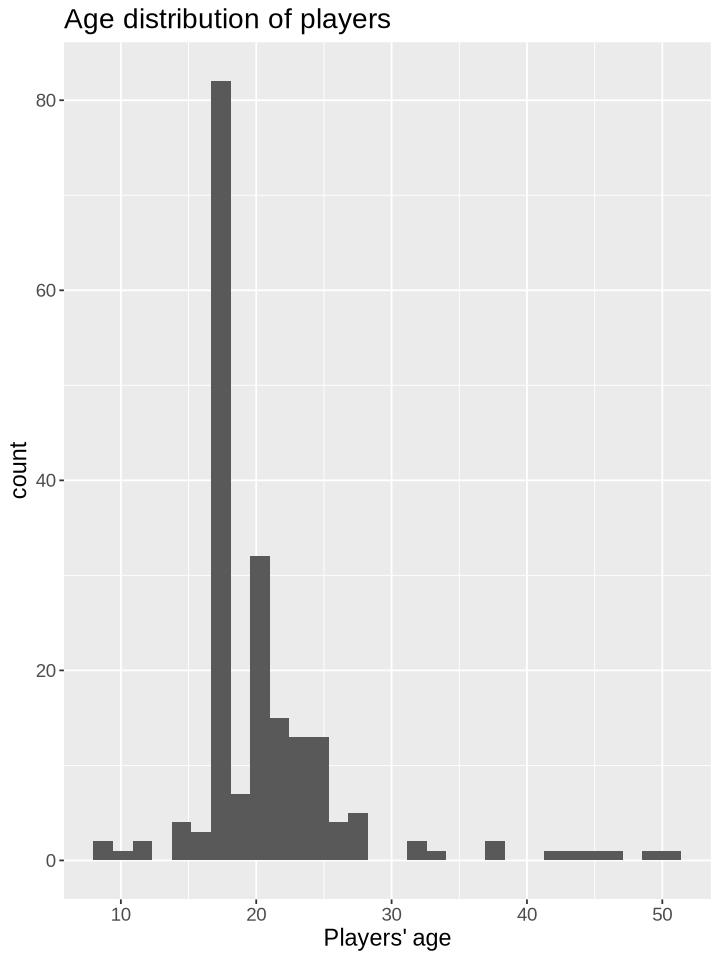

In [7]:
# Visualization1: To find the age distribution of players
options(repr.plot.width = 6, repr.plot.height = 8)
age_plot <- ggplot(Players, aes(x=Age)) +
                   geom_histogram() +
                   labs(x = "Players' age") +
                   ggtitle("Age distribution of players") +
                   theme(text = element_text(size = 14)) 
age_plot

Warning message in geom_bar(state = identity):
“Ignoring unknown parameters: `state`”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


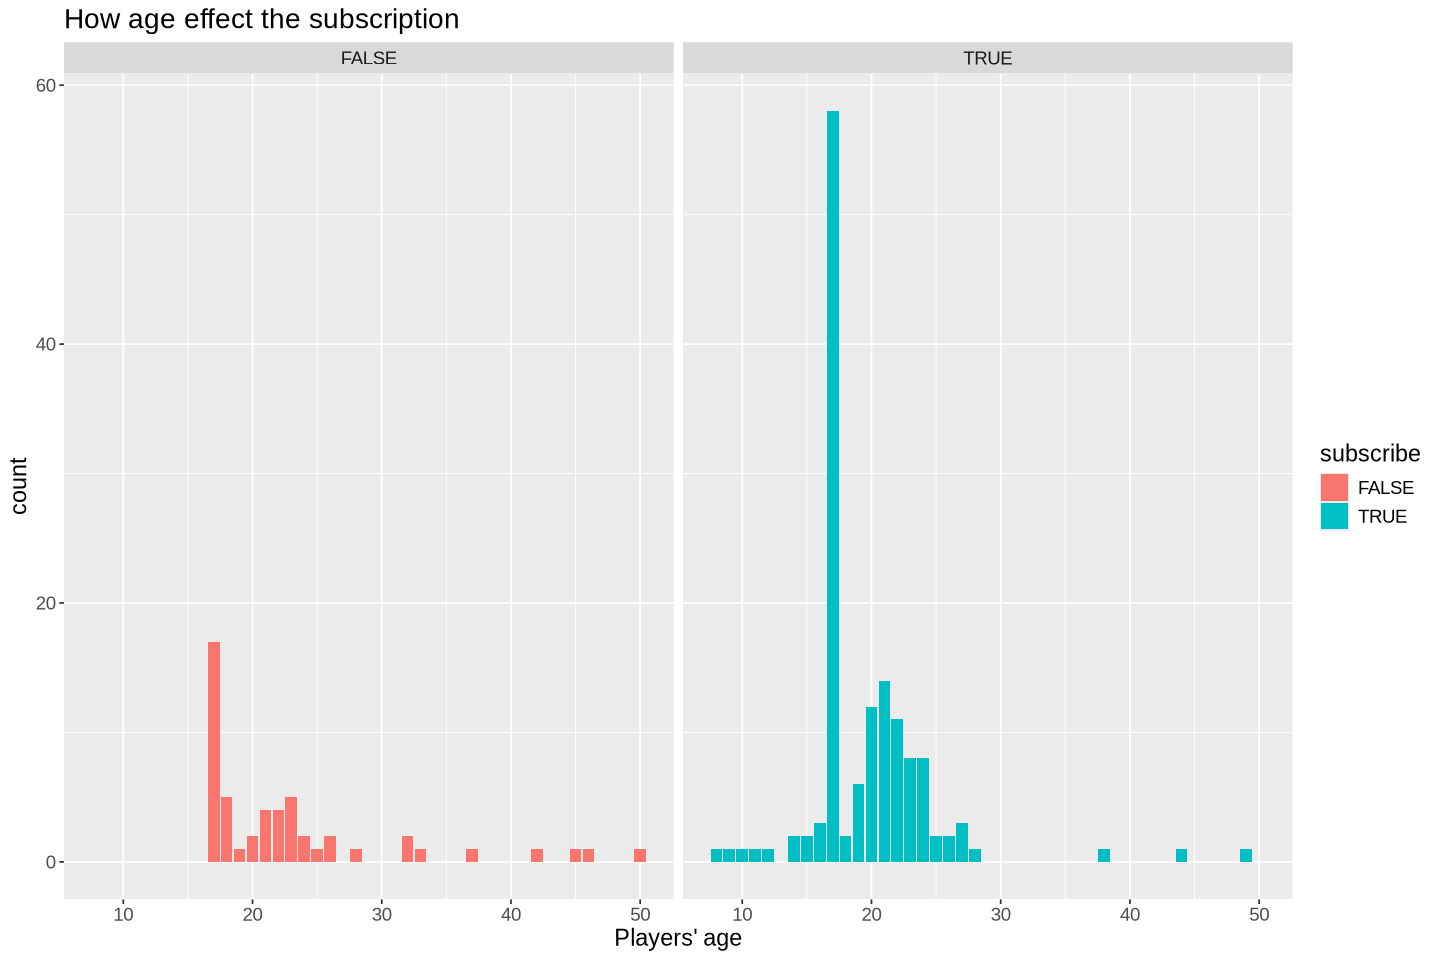

In [8]:
# Visualization2: How players' age effect the subscription
options(repr.plot.width = 12, repr.plot.height = 8)
age_effect <- ggplot(Players, aes(x=Age, fill=subscribe))+
                   geom_bar(state = identity) +
                   facet_grid(cols = vars(subscribe)) +
                   labs(x = "Players' age") +
                   ggtitle("How age effect the subscription") +
                   theme(text = element_text(size = 14),
                         legend.position = "right",
                         legend.direction = "vertical")
age_effect

Warning message in geom_bar(state = identity):
“Ignoring unknown parameters: `state`”
Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_count()`).”


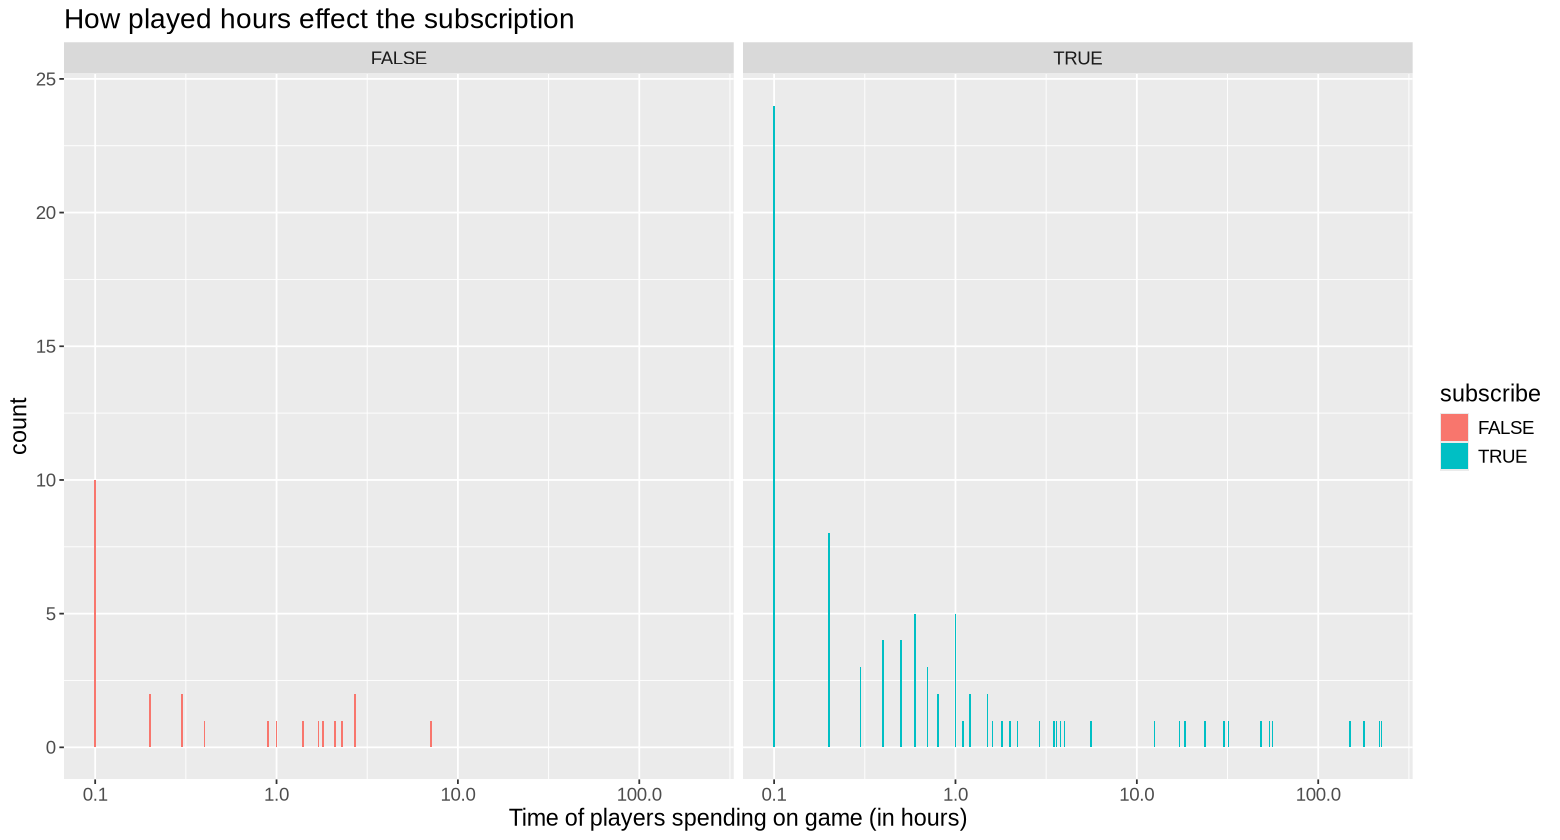

In [9]:
# Visualization3: How played hours effect the subscription
options(repr.plot.width = 13, repr.plot.height = 7)
hours_effect <- ggplot(Players, aes(x=played_hours, fill=subscribe))+
                   geom_bar(state = identity) +
                   labs(x = "Time of players spending on game (in hours)") +
                   facet_grid(cols = vars(subscribe)) +
                   ggtitle("How played hours effect the subscription") +
                   theme(text = element_text(size = 14)) +
                   scale_x_log10(labels = label_comma())
hours_effect

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


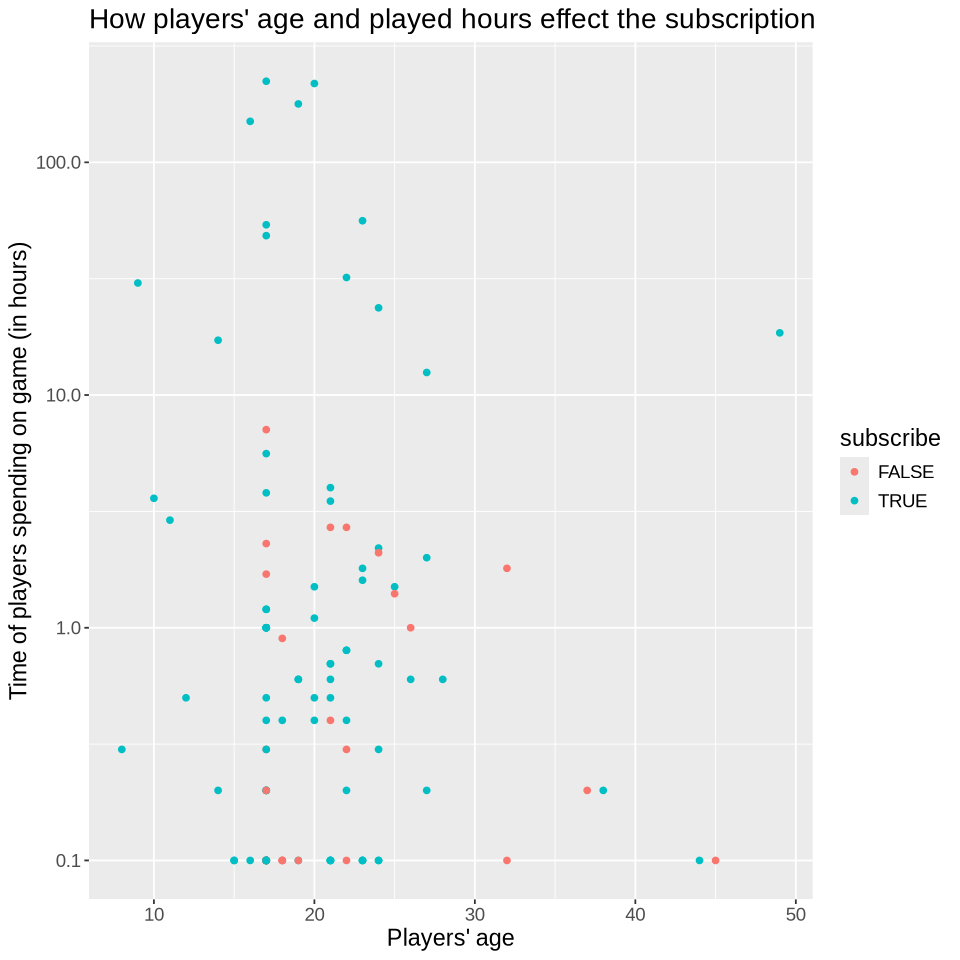

In [10]:
# Visualization4: How age and played hours influence the subscription
options(repr.plot.width = 8, repr.plot.height = 8)
Players_filter <- filter(Players, played_hours!=0) # Remove the varibles of played_hours that is 0

age_hours_effect <- ggplot(Players_filter, aes(x=Age, y=played_hours, colour=subscribe))+
                   geom_point() +
                   labs(x = "Players' age", y= "Time of players spending on game (in hours)") +
                   ggtitle("How players' age and played hours effect the subscription") +
                   theme(text = element_text(size = 14)) +
                   scale_y_log10(labels = label_comma())
age_hours_effect

Warning message in geom_bar(state = identity):
“Ignoring unknown parameters: `state`”


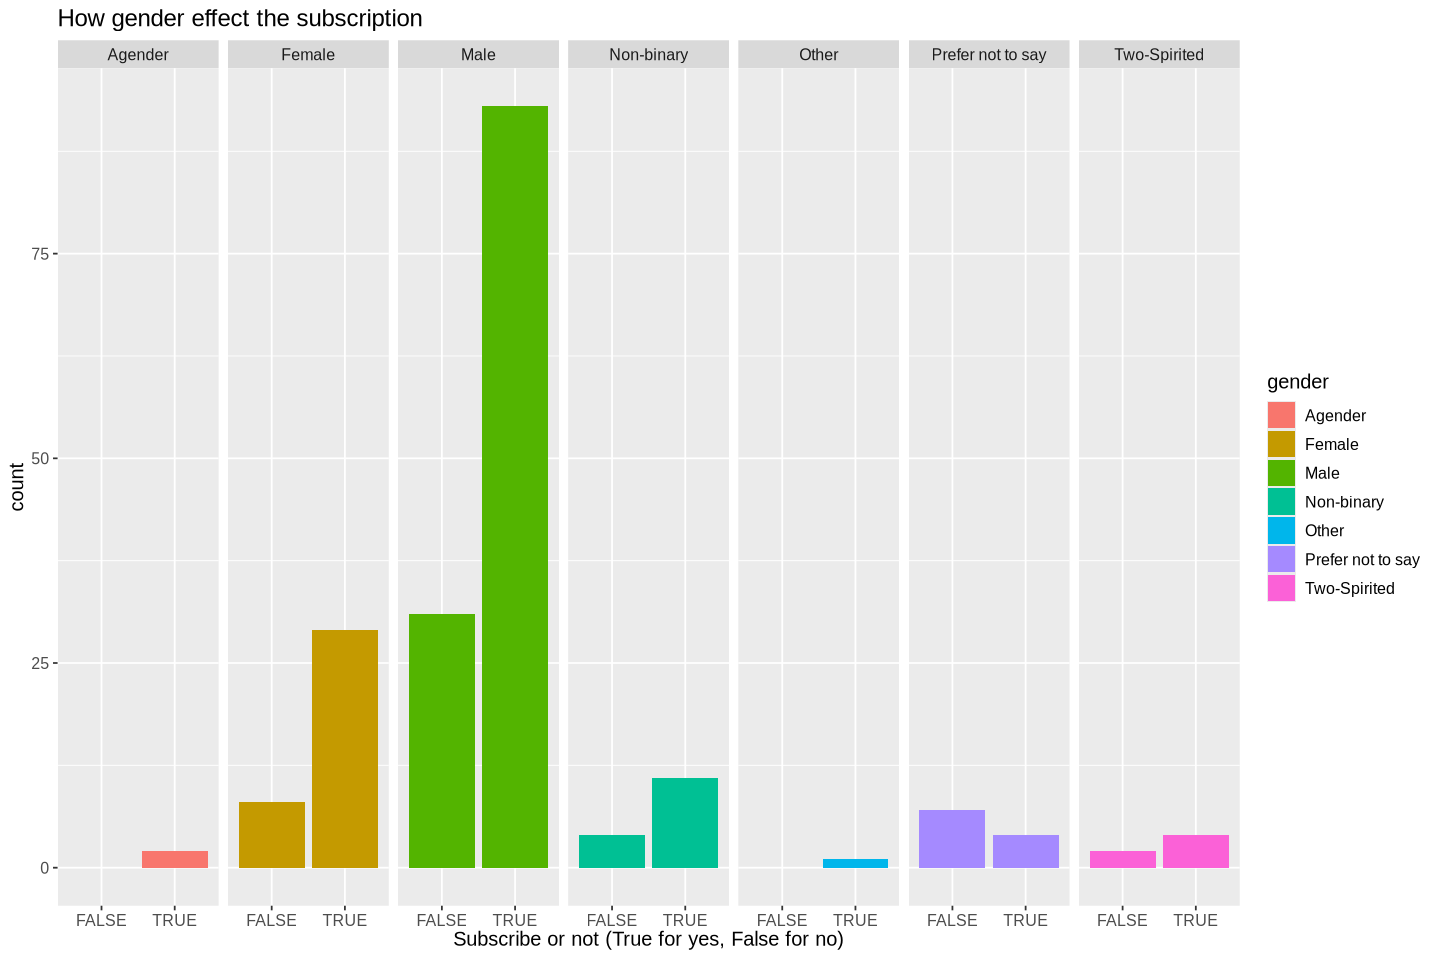

In [11]:
# Visualization5: How players' gender effect the subscription
options(repr.plot.width = 12, repr.plot.height = 8)
gender_effect <- ggplot(Players, aes(x=subscribe, fill=gender))+
                   geom_bar(state = identity) +
                   facet_grid(cols = vars(gender)) +
                   labs(x = "Subscribe or not (True for yes, False for no)") +
                   ggtitle("How gender effect the subscription") +
                   theme(text = element_text(size = 12),
                         legend.position = "right",
                         legend.direction = "vertical")
gender_effect

#### Explain insights I gain from these plots that are relevant to address my question
- Most players fall between 15 to 25 years old. Older players (above 35) are less frequent in the dataset. Although there are more younger players subscribes, the number of younger players are higher than older players. Therefore, it is hard to find the relationship between `Age` and`subscribe` only by these plots.

- The players who subscribes (blue dots in `age_hours_effect`) tend to spend more time on playing this game. However, there is a wide variation in `played_hours` among subscribers, some play less than 1 hour, while others play over 100 hours. It suggests that `subscribe` is not only dependent on `played_hours`, but might be influenced by other factors.

- All in all, `Age` alone does not seem to strongly determine `subscribe`, as the number of young players are more than older players, and both young and older players can be either subscribers or non-subscribers. `played_hours` do not have a obvious  relationship with `subscribe`, with both some high-playtime players and low-playtime players subscribe, and only a few low players do not. Besides, there are more people who subscribe than those who don’t. Therefore, the impact of `played_hours` alone on `subscribe` is not significant. It is hard to find the relationship between `Age`, `played_hours` and `subscribe`.

- To quantify the relationship, we can use classification to predict `subscribe` probability.

## 4. Methods and Plan

### Method: 
- To address the question "Can `Age` and `played_hours` predict `subscribe` in the `Players` dataset?", I propose using a classification (K-Nearest Neighbors algorithm) model to predict `subscribe` based on `Age` and `played_hours`.
### Reason: 
- We need to build a prediction model by finding the relationship between past data and results to predict whether we can further judge the results (`subscribe`) under known data (`Age`, `played_hours`). To solve this problem, Classification is a good choice.
- The target variable `subscribe` has two categories (True for Subscribed, False for Not Subscribed) since we are predicting a categorical outcome, classification models are the most appropriate choice.
### Limitation:
- There is a risk of overfitting to the training data. Classificaiton model could become overly complex and memorize patterns from the training data instead of generalizing well to new players. The model may perform well on training data but poorly on unseen test data, leading to unreliable predictions.
- The imbalanced data nay influence predictions. The number of True is more than False, the model may learn to predict the majority class most of the time. It can be misleading when the dataset is unbalanced.
### Model Comparison and Selection
- To compare different models, we will evaluate them using the following metrics:
  - Accuracy: Measures the overall correctness of predictions.
  - Precision: Ensures correct identification of `subscribes`.
  - Checks if the model effectively identifies subscribers.
  - Measures how well the model distinguishes between subscribers and non-subscribers.
- The best model will be the one that maximizes accuracy while maintaining a good balance between precision and recall. We will test different values of K (e.g., K=3, 5, 7, 11, 15) and select the one that provides the best balance of performance and generalization.
### Process the Data
- Data Preprocessing.
  - Dealing with the missing values: If `Age` or `played_hours` have missing values, we would remove them.
  - Ensure `subscribe` is converted to binary (`1 = True`, `2 = False`).
  - Since KNN uses "distance-based classification", we must standardize `Age` and `played_hours` to ensure fair distance calculations.
- Data Splitting Strategy: We will divide the dataset into training, validation, and test sets.
  - Training Set (75%): Used to train the KNN model.
  - Validation Set (15%): Used to fine-tune the hyperparameter K.
  - Test Set (10%): Used for final model evaluation.
- Select the best value of K: We will use 5-fold cross validation.
  - We split the training set into 5 subsets. The model is trained on 4 subsets and tested on the remaining subset. The process repeats 5 times, rotating the test subset each time. The average performance across all 5 iterations determines the best K.
- Apply the best K on the test set to assess the real-world performance.